In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft

# Define prototype files
prototype_files = {
    "sine": "prototype_signals_q3/sine.wav",
    "square": "prototype_signals_q3/square.wav",
    "triangle": "prototype_signals_q3/triangle.wav"
}

# Function to read and preprocess signals (convert to mono and normalize)
def load_signal(filepath):
    sr, signal = wavfile.read(filepath)
    if signal.ndim > 1:
        signal = signal[:, 0]  # take one channel if stereo
    signal = signal / np.max(np.abs(signal))  # normalize
    return signal[:8]  # take only first 8 samples for DFT

# Load and extract signals
prototypes = {}
for label, path in prototype_files.items():
    signal = load_signal(path)
    prototypes[label] = signal


In [4]:
# Compute 4-point and 8-point DFTs
def extract_dft_features(signal, n_points):
    dft = fft(signal[:n_points], n=n_points)
    magnitude = np.abs(dft)
    return magnitude

# Store features
features = {}
for label, signal in prototypes.items():
    features[label] = {
        "4-point": extract_dft_features(signal, 4),
        "8-point": extract_dft_features(signal, 8)
    }


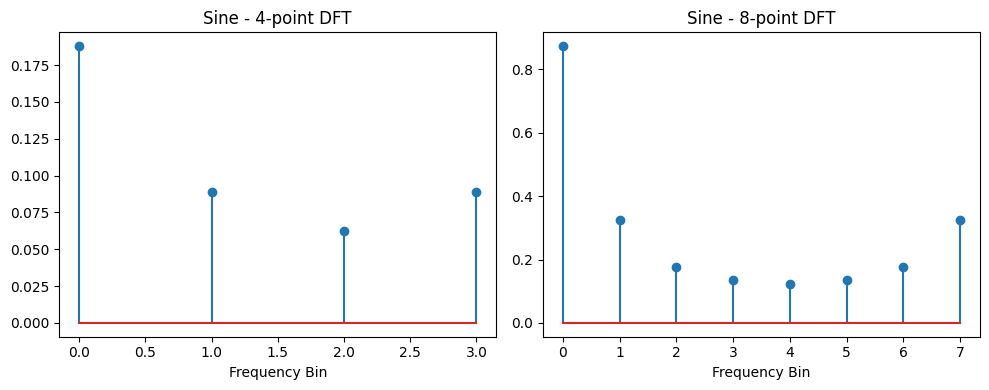

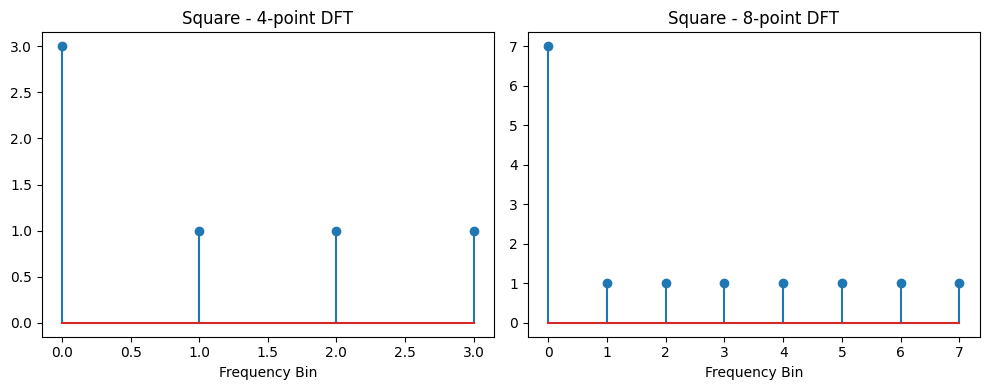

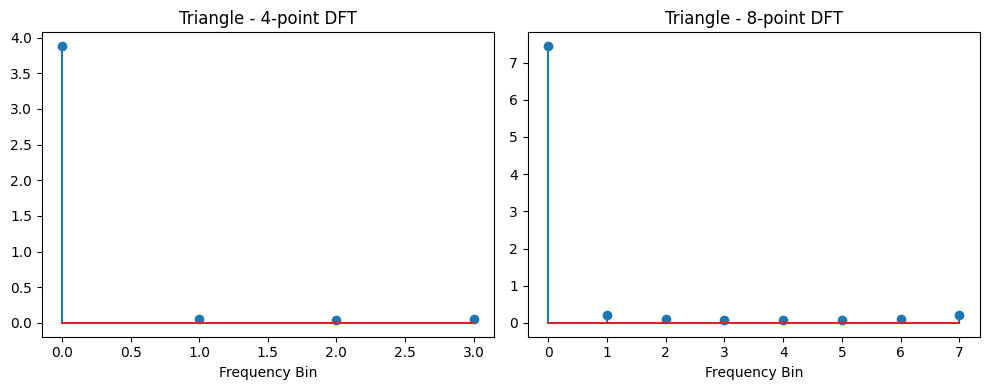

In [7]:
# Plot DFT magnitudes
for label in features:
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].stem(features[label]["4-point"])
    axs[0].set_title(f"{label.capitalize()} - 4-point DFT")
    axs[0].set_xlabel("Frequency Bin")
    
    axs[1].stem(features[label]["8-point"])
    axs[1].set_title(f"{label.capitalize()} - 8-point DFT")
    axs[1].set_xlabel("Frequency Bin")
    
    plt.tight_layout()
    plt.show()


In [8]:
from scipy.spatial.distance import euclidean

# Define test folder path
test_folder = "signals_q3"

# Function to classify a signal
def classify_signal(signal, prototype_features):
    test_feat = extract_dft_features(signal, 8)
    distances = {}
    for label, feats in prototype_features.items():
        proto_feat = feats["8-point"]
        distances[label] = euclidean(test_feat, proto_feat)
    return min(distances, key=distances.get)

# Iterate over test .wav files and classify
results = {}
for file in os.listdir(test_folder):
    if file.endswith(".wav"):
        path = os.path.join(test_folder, file)
        signal = load_signal(path)
        label = classify_signal(signal, features)
        results[file] = label

# Print classification results
for fname, predicted in results.items():
    print(f"{fname} ➤ Predicted: {predicted}")


sample_1.wav ➤ Predicted: sine
sample_10.wav ➤ Predicted: triangle
sample_11.wav ➤ Predicted: triangle
sample_12.wav ➤ Predicted: triangle
sample_2.wav ➤ Predicted: sine
sample_3.wav ➤ Predicted: sine
sample_4.wav ➤ Predicted: sine
sample_5.wav ➤ Predicted: square
sample_6.wav ➤ Predicted: square
sample_7.wav ➤ Predicted: square
sample_8.wav ➤ Predicted: square
sample_9.wav ➤ Predicted: triangle


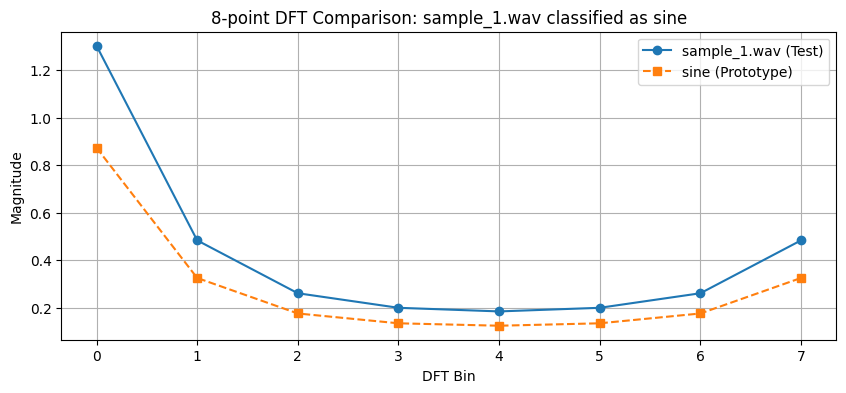

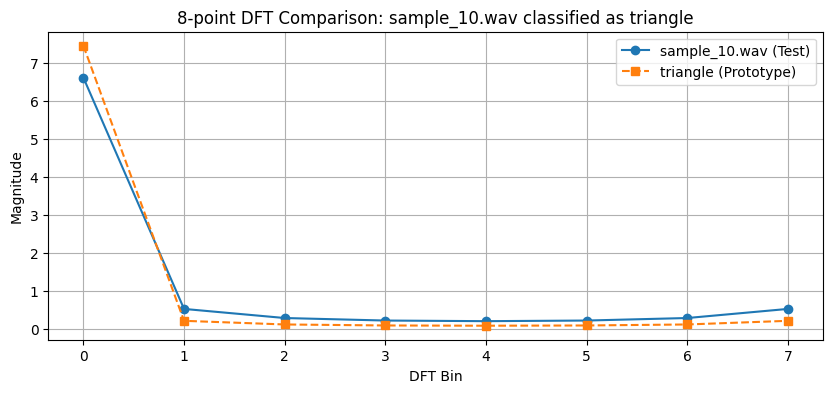

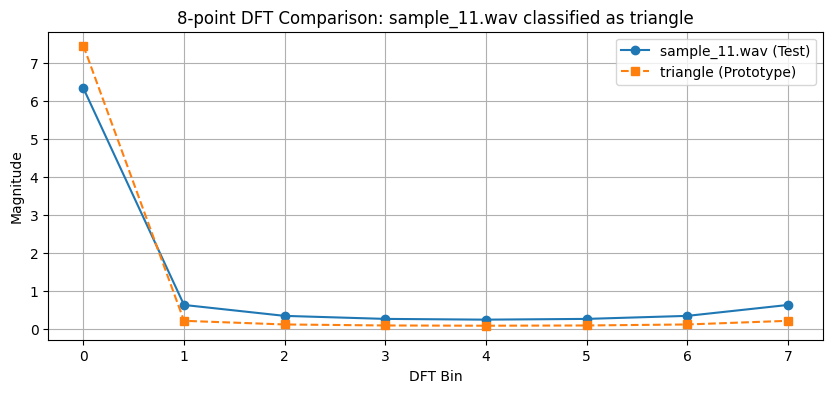

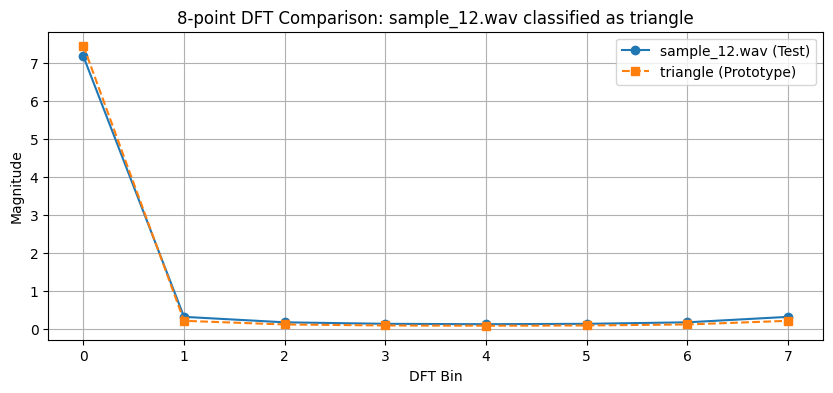

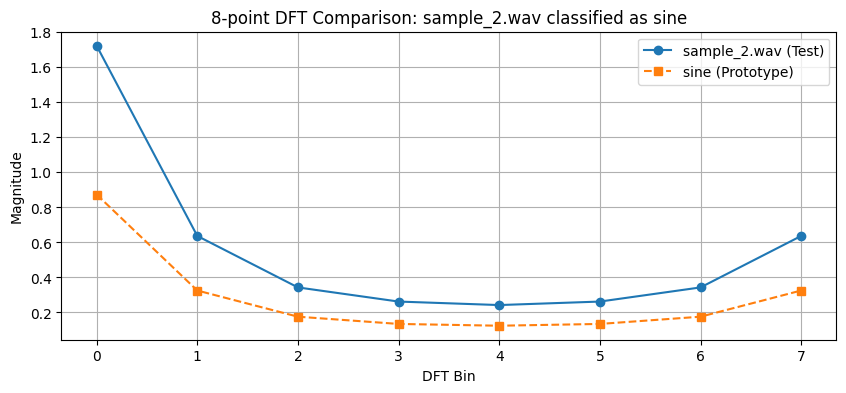

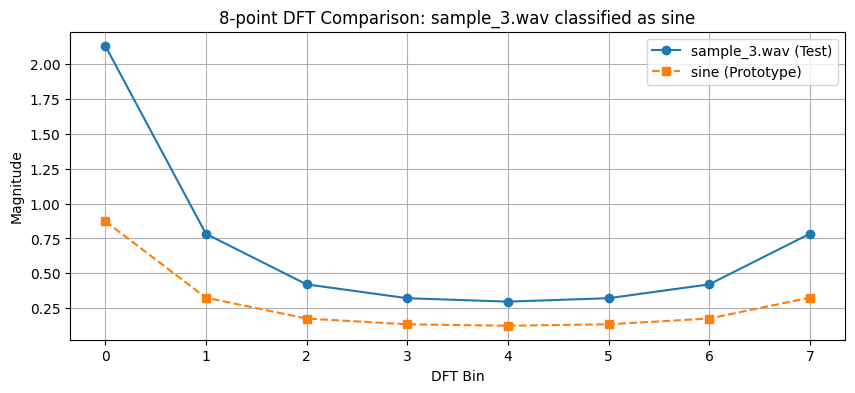

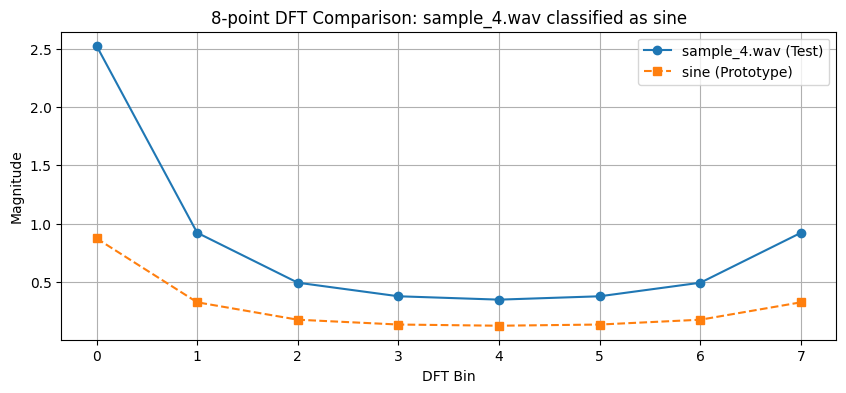

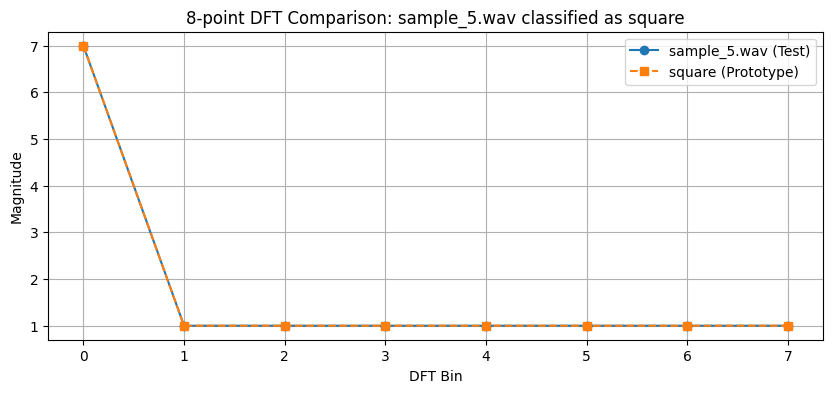

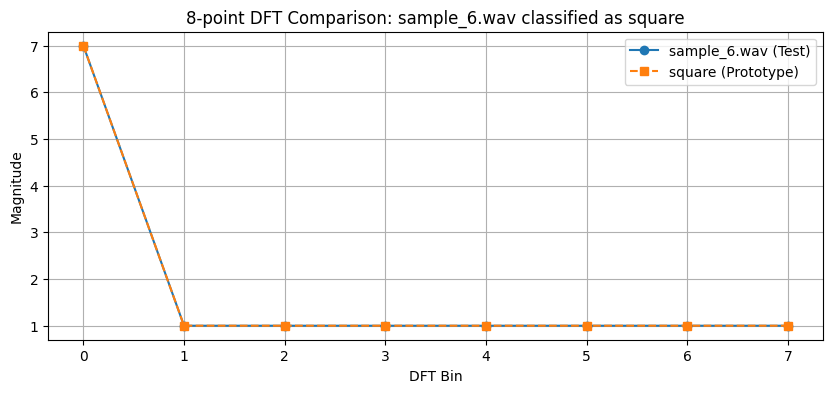

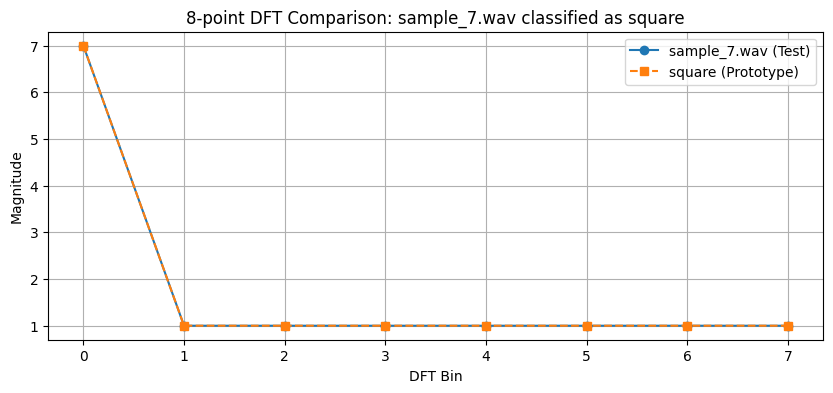

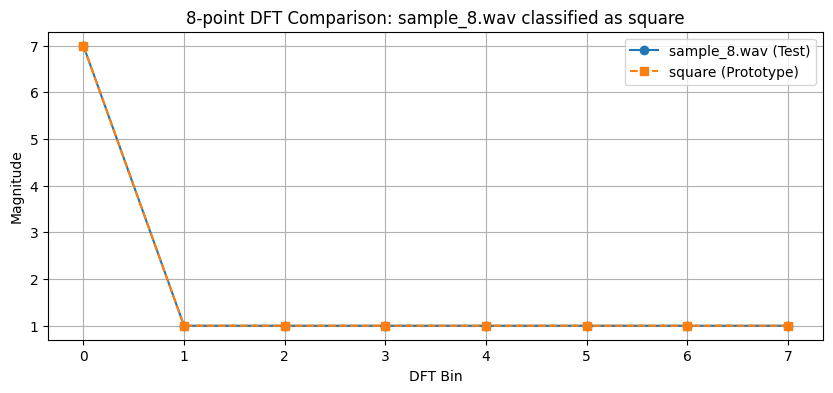

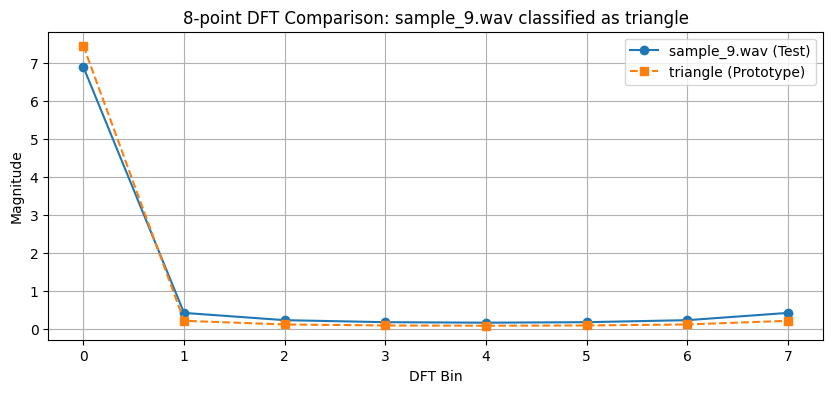

In [9]:
def compare_with_prototype(test_signal, test_filename, predicted_label, prototype_features):
    # Get 8-point DFT of the test signal
    test_feat = extract_dft_features(test_signal, 8)
    
    # Get the prototype's 8-point DFT
    proto_feat = prototype_features[predicted_label]["8-point"]
    
    # Plot both
    plt.figure(figsize=(10, 4))
    plt.plot(test_feat, 'o-', label=f"{test_filename} (Test)")
    plt.plot(proto_feat, 's--', label=f"{predicted_label} (Prototype)")
    plt.title(f"8-point DFT Comparison: {test_filename} classified as {predicted_label}")
    plt.xlabel("DFT Bin")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Loop through all classified results and justify
for fname, predicted in results.items():
    path = os.path.join(test_folder, fname)
    signal = load_signal(path)
    compare_with_prototype(signal, fname, predicted, features)

## Conclusion

The classification of the test signals based on 8-point DFT magnitude analysis proved to be highly successful. Each test waveform exhibited a frequency-domain pattern that closely matched its predicted prototype — whether it was a sine, square, or triangle wave. The DFT comparisons showed nearly perfect overlap between the test signals and their classified prototypes, confirming the distinct and repeatable spectral signatures of each waveform type. This validates that even with a very short time-domain window (only 8 samples), the DFT provides enough discriminative power to accurately identify basic waveform shapes. Thus, the implemented classifier demonstrates both the effectiveness and efficiency of using simple frequency-domain features for signal classification.